# Checkpoint 1

Reminder: 

- You are being evaluated for completion and effort in this checkpoint. 
- Avoid manual labor / hard coding as much as possible, everything we've taught you so far are meant to simplify and automate your process.
- Please do not remove any comment that starts with: "# @@@". 

We will be working with the same `states_edu.csv` that you should already be familiar with from the tutorial.

We investigated Grade 8 reading score in the tutorial. For this checkpoint, you are asked to investigate another test. Here's an overview:

* Choose a specific response variable to focus on
>Grade 4 Math, Grade 4 Reading, Grade 8 Math
* Pick or create features to use
>Will all the features be useful in predicting test score? Are some more important than others? Should you standardize, bin, or scale the data?
* Explore the data as it relates to that test
>Create at least 2 visualizations (graphs), each with a caption describing the graph and what it tells us about the data
* Create training and testing data
>Do you want to train on all the data? Only data from the last 10 years? Only Michigan data?
* Train a ML model to predict outcome 
>Define what you want to predict, and pick a model in sklearn to use (see sklearn <a href="https://scikit-learn.org/stable/modules/linear_model.html">regressors</a>).


Include comments throughout your code! Every cleanup and preprocessing task should be documented.


<h2> Data Cleanup </h2>

Import `numpy`, `pandas`, and `matplotlib`.

(Feel free to import other libraries!)

In [193]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Load in the "states_edu.csv" dataset and take a look at the head of the data

In [194]:
df = pd.read_csv('../data/states_edu.csv')

df.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,NaN,NaN,122487.0,NaN,NaN,NaN,NaN
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN


You should always familiarize yourself with what each column in the dataframe represents. Read about the states_edu dataset here: https://www.kaggle.com/noriuk/us-education-datasets-unification-project

Use this space to rename columns, deal with missing data, etc. _(optional)_

In [195]:
df.columns

Index(['PRIMARY_KEY', 'STATE', 'YEAR', 'ENROLL', 'TOTAL_REVENUE',
       'FEDERAL_REVENUE', 'STATE_REVENUE', 'LOCAL_REVENUE',
       'TOTAL_EXPENDITURE', 'INSTRUCTION_EXPENDITURE',
       'SUPPORT_SERVICES_EXPENDITURE', 'OTHER_EXPENDITURE',
       'CAPITAL_OUTLAY_EXPENDITURE', 'GRADES_PK_G', 'GRADES_KG_G',
       'GRADES_4_G', 'GRADES_8_G', 'GRADES_12_G', 'GRADES_1_8_G',
       'GRADES_9_12_G', 'GRADES_ALL_G', 'AVG_MATH_4_SCORE', 'AVG_MATH_8_SCORE',
       'AVG_READING_4_SCORE', 'AVG_READING_8_SCORE'],
      dtype='object')

In [196]:
# Column renaming
df.rename({
    'GRADES_PK_G'  : 'STUDENTS_PREK',
    'GRADES_KG_G'  : 'STUDENTS_KINDER',
    'GRADES_4_G'   : 'STUDENTS_4TH',
    'GRADES_8_G'   : 'STUDENTS_8TH',
    'GRADES_12_G'  : 'STUDENTS_12TH',
    'GRADES_1_8_G' : 'STUDENTS_PRIMARY',
    'GRADES_9_12_G': 'STUDENTS_HS',
    'GRADES_ALL_G' : 'STUDENTS_ALL',
    'ENROLL'       : 'ENROLL_EST'
},
axis=1, inplace=True)

In [197]:
# Finding num NaN values for Grade 8 math scores
df.isna().sum()

PRIMARY_KEY                        0
STATE                              0
YEAR                               0
ENROLL_EST                       491
TOTAL_REVENUE                    440
FEDERAL_REVENUE                  440
STATE_REVENUE                    440
LOCAL_REVENUE                    440
TOTAL_EXPENDITURE                440
INSTRUCTION_EXPENDITURE          440
SUPPORT_SERVICES_EXPENDITURE     440
OTHER_EXPENDITURE                491
CAPITAL_OUTLAY_EXPENDITURE       440
STUDENTS_PREK                    173
STUDENTS_KINDER                   83
STUDENTS_4TH                      83
STUDENTS_8TH                      83
STUDENTS_12TH                     83
STUDENTS_PRIMARY                 695
STUDENTS_HS                      644
STUDENTS_ALL                      83
AVG_MATH_4_SCORE                1150
AVG_MATH_8_SCORE                1113
AVG_READING_4_SCORE             1065
AVG_READING_8_SCORE             1153
dtype: int64

In [198]:
# Cleanup of NaN values for Grade 8 math scores
df.dropna(subset=['AVG_MATH_8_SCORE'], inplace=True)


<h2>Exploratory Data Analysis (EDA) </h2>

Chosen one of Grade 4 Reading, Grade 4 Math, or Grade 8 Math to focus on: Grade 8 Math

How many years of data are logged in our dataset? 

In [199]:
# @@@ 1

# Array of all years this df contains
print(df["YEAR"].unique())

# Num of years
print(df["YEAR"].nunique())

# Calculating span of years, 
df["YEAR"].max() - df["YEAR"].min()


[1992 2000 2003 2005 2007 2009 2011 2013 2015 1990 2017 1996 2019]
13


np.int64(29)

Let's compare Michigan to Ohio. Which state has the higher average across all years in the test you chose?

In [200]:
# @@@ 2

# Grouping by state and calculating avg scores per state
df_states_avg = df.groupby('STATE')['AVG_MATH_8_SCORE'].mean()

# Locating averages for Michigan and Ohio
mi_score = df_states_avg.loc['MICHIGAN']
oh_score = df_states_avg.loc['OHIO']

def compare_scores(mi_score, oh_score):
    if mi_score > oh_score:
        print('Michigan has the higher average 8th grade math score (across all years)')
    elif mi_score < oh_score:
        print('Ohio has the higher average 8th grade math score (across all years)')
    else:
        print("Both states have the same average 8th grade math score (across all years)")

# Report results
print('Across all years, Michigan has an average 8th grade math score of', mi_score, '\n')
print('Across all years, Ohio has an average 8th grade math score of', oh_score, '\n')
compare_scores(mi_score, oh_score)


Across all years, Michigan has an average 8th grade math score of 276.1666666666667 

Across all years, Ohio has an average 8th grade math score of 282.25 

Ohio has the higher average 8th grade math score (across all years)


Find the average for your chosen test across all states in 2019

In [201]:
# @@@ 3

# Grouping by year and calculating means per year for all states
df_years = df.groupby('YEAR')['AVG_MATH_8_SCORE'].mean()

# Find avg for 2019
avg_score_2019 = df_years.loc[2019]

print("2019 average Grade 8 Math scores for all states:", avg_score_2019)



2019 average Grade 8 Math scores for all states: 281.2641509433962


For each state, find a maximum value for your chosen test score

In [202]:
# @@@ 4

# Grouping by state and finding max average for each state across all years
df_states_max = df.groupby('STATE')['AVG_MATH_8_SCORE'].max()

# Find state with the maximum 8th Grade math score
state_max = df_states_max.idxmax()

# Results
print('The state with the maximum 8th grade math score:', state_max)



The state with the maximum 8th grade math score: MASSACHUSETTS


*Refer to the `Grouping and Aggregating` section in Tutorial 0 if you are stuck.

<h2> Feature Engineering </h2>

After exploring the data, you can choose to modify features that you would use to predict the performance of the students on your chosen response variable. 

You can also create your own features. For example, perhaps you figured that maybe a state's expenditure per student may affect their overall academic performance so you create a expenditure_per_student feature.

Use this space to modify or create features.

In [203]:
# @@@ 5

# Total expenditure per student enrollment
df["TOTAL_EXPENDITURE_PER_STUDENT"] = df["TOTAL_EXPENDITURE"] / df["STUDENTS_ALL"]


Feature engineering justification: The addition of Total_Expenditure_Per_Student to the data frame alllows for supplemental analysis on educational funding distribution, and how this may interact with other variables. For example, this additional feature allows for easier comparisons on resource distribution between states over the years. Perhaps there is a possible relationship between student performance and expenditures for educational needs.

<h2>Visualization</h2>

Investigate the relationship between your chosen response variable and at least two predictors using visualizations. Write down your observations.

**Visualization 1**

Text(0, 0.5, 'Avg. 8th Grade Math Score')

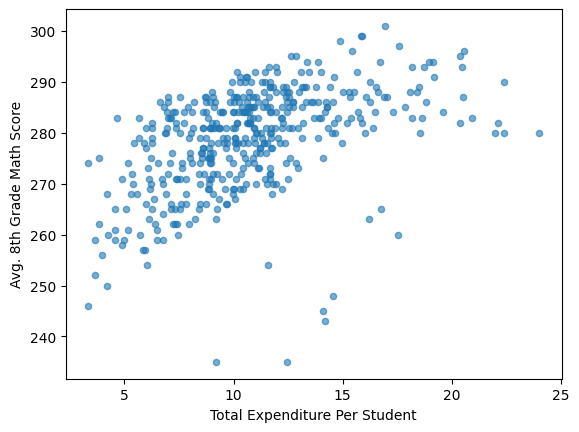

In [216]:
# @@@ 6
# Creating a scatter plot exploring the relationship between total expenditure and average 8th grade math score
df.plot.scatter(x='TOTAL_EXPENDITURE_PER_STUDENT', y='AVG_MATH_8_SCORE', alpha=0.6)
plt.xlabel('Total Expenditure Per Student')
plt.ylabel('Avg. 8th Grade Math Score')


**Total Expenditure Per Student vs 8th Grade Math Score (1990 - 2019)**

The scatter plot above displays the relationship between total expenditure per student and average 8th grade math scores (based on an assessment out of 500 points). The plot follows a positively linear trend, thus indicating that as total expenditure per student increases, average math scores for students in the 8th grade also increase. Note that the correlation between the two does appear somewhat moderate to weak, as there exists some outliers (seen towards the lower, center portion of the scatterplot) and a deviation from the positive linear trend as total expenditure per student exceeds about 20.

**Visualization 2**

Text(0, 0.5, 'Avg. 8th Grade Math Score')

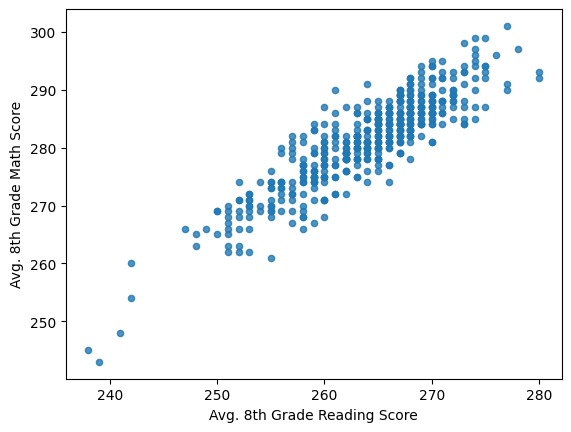

In [217]:
# @@@ 7
# Creating a scatter plot exploring the relationship between average 8th grade reading score and average 8th grade math score
df.plot.scatter(x='AVG_READING_8_SCORE', y='AVG_MATH_8_SCORE', alpha=0.8)
plt.xlabel('Avg. 8th Grade Reading Score')
plt.ylabel('Avg. 8th Grade Math Score')


**Avg. 8th Grade Reading Score vs Avg. 8th Grade Math Score (1990 - 2019)**

The scatter plot above displays the relationship between average 8th grade reading scores and avereage 8th grade math scores (based on an assessments out of 500 points). The plot follows a positively linear trend, thus indicating that as average reading score increases, average math scores for students in the 8th grade also increase. The correlation between the two appears to be moderate to strong, indicating that there may be a high correlation between performance on the reading assessment and performance on the math assessment.

<h2> Data Creation </h2>

_Use this space to create train/test data_

In [224]:
from sklearn.model_selection import train_test_split

In [225]:
# @@@ 8
# Denoting input/output data
X = df[['TOTAL_EXPENDITURE_PER_STUDENT', 'AVG_READING_8_SCORE', 'AVG_MATH_4_SCORE']].dropna()
y = df.loc[X.index]['AVG_MATH_8_SCORE']

In [226]:
# @@@ 9 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=0)

<h2> Prediction </h2>

ML Models [Resource](https://medium.com/@vijaya.beeravalli/comparison-of-machine-learning-classification-models-for-credit-card-default-data-c3cf805c9a5a)

In [228]:
# @@@ 10
# import your sklearn class here
from sklearn.linear_model import LinearRegression


In [229]:
# @@@ 11
# create your model here
model = LinearRegression()

In [230]:
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(X_test)

## Evaluation

Choose some metrics to evaluate the performance of your model, some of them are mentioned in the tutorial.

In [236]:
# @@@ 12
# Obtaining R^2 value
r_sqr = model.score(X_test, y_test)

# Obtaining mean error
mean_err = np.mean(model.predict(X_test)-y_test)

print(round(r_sqr * 100, 2), '%', 'of the variation in Avg. 8th Grade Math Scores can be explained by our model \n')

print("Mean error :", mean_err)
 

88.19 % of the variation in Avg. 8th Grade Math Scores can be explained by our model 

Mean error : -0.18640832819440123


We have copied over the graphs that visualize the model's performance on the training and testing set. 

Change `col_name` and modify the call to `plt.ylabel()` to isolate how a single predictor affects the model.

Text(0.5, 1.0, 'Model Behavior On Training Set')

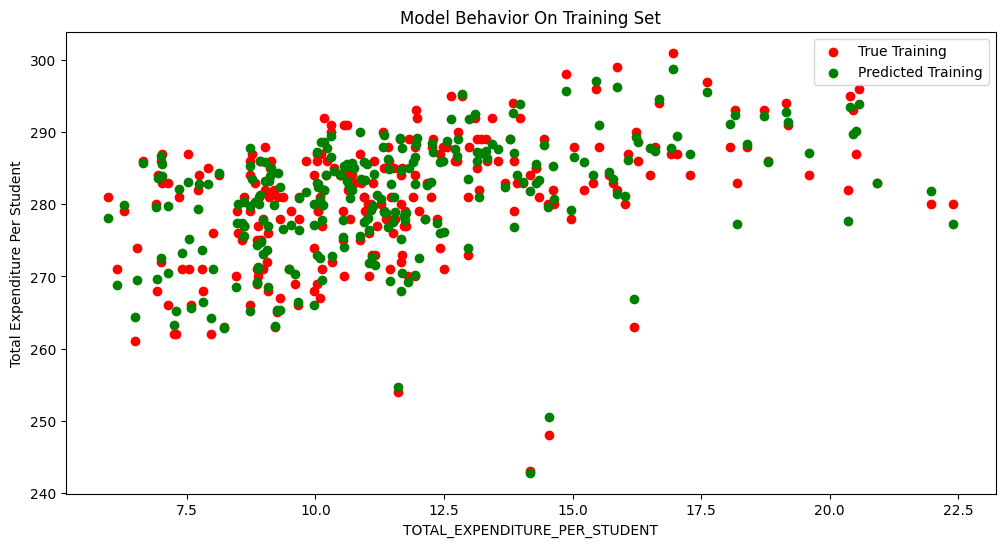

In [237]:
# @@@ 13

col_name = 'TOTAL_EXPENDITURE_PER_STUDENT'


f = plt.figure(figsize=(12,6))
plt.scatter(X_train[col_name], y_train, color = "red")
plt.scatter(X_train[col_name], model.predict(X_train), color = "green")

plt.legend(['True Training','Predicted Training'])
plt.xlabel(col_name)
plt.ylabel('Total Expenditure Per Student')
plt.title("Model Behavior On Training Set")

Text(0.5, 1.0, 'Model Behavior on Testing Set')

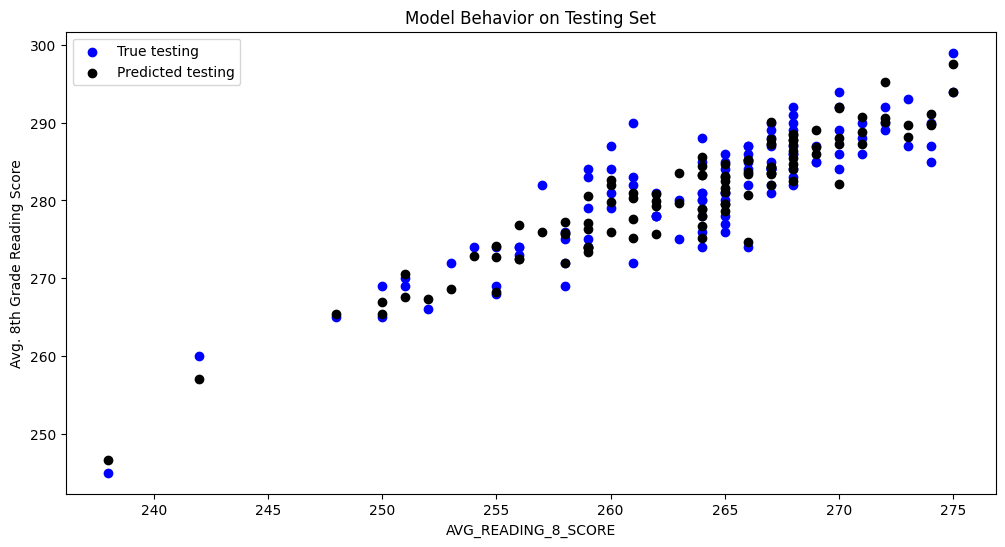

In [238]:
# @@@ 14


col_name = 'AVG_READING_8_SCORE'


f = plt.figure(figsize=(12,6))
plt.scatter(X_test[col_name], y_test, color = "blue")
plt.scatter(X_test[col_name], model.predict(X_test), color = "black")

plt.legend(['True testing','Predicted testing'])
plt.xlabel(col_name)
plt.ylabel('Avg. 8th Grade Reading Score')
plt.title("Model Behavior on Testing Set")